# Regression Analysis in Real Estate
This is the part of Inronhack Mid-term Bootcamp project. 

## Objective

- The following project will idenfity the factors that influnce to the selling price of properties.
- The following project will predict the houing price using machine learning algorithms (Linear Regression, KNNNeighbour Regressor & Random Forest Regressor)


## Dataset

- The dataset consists of information on 22,000 properties. 
- The dataset consists of historic data of houses sold between May 2014 to May 2015 in King County WA.
- These are the definitions of data points provided:

| Column Name   | Description                                                                 |
| ------------- | --------------------------------------------------------------------------- |
| id            | ID of the house                                                             |
| date          | Date the house was sold                                                     |
| bedrooms      | Number of bedrooms                                                          |
| bathrooms     | Number of bathrooms                                                         |
| sqft_living   | Square footage of the home                                                   |
| sqft_lot      | Square footage of the lot                                                   |
| floors        | Total floors in the house                                                   |
| waterfront    | House which has a view to a waterfront                                      |
| view          | Has been viewed                                                             |
| condition     | How good the condition is overall                                           |
| grade         | Overall grade given to the housing unit, based on King County grading system|
| sqft_above    | Square footage of house apart from basement                                 |
| sqft_basement | Square footage of the basement                                              |
| yr_built      | Built Year                                                                  |
| yr_renovated  | Year when the house was renovated                                           |
| zipcode       | Zip code                                                                    |
| lat           | Latitude coordinate                                                         |
| long          | Longitude coordinate                                                        |
| sqft_living15 | Living room area in 2015 (implies-- some renovations)                       |
| sqft_lot15    | Lot size area in 2015 (implies-- some renovations)                          |
| price         | Price of the house                                                          |
| district      | District where the house is located                                         |



# Project Structure
1. Import libraries & Load Dataset
2. Overview of Dataset
3. Data Cleaning
4. Exploratory Data Analysis (EDA)
5. Data Modelling: Linear Regressor, KNN Regressor, Random Forest Regressor
6. Cross examination of modesl
7. Feature importance
8. Conclusion


# 1. Import libraries & Load Dataset

In [26]:
# Import necessary libraries & load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler


In [27]:
df = pd.read_excel('/Users/dooinnkim/ironhack_da_may_2023/data_mid_bootcamp_project_regression/datasets/regression_data.xls')

# 2. Overview of Data

In [28]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [29]:
df.shape

(21597, 21)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21597.0,7.657915e+00,1.173200e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


### Summary of the Dataset
- There are 21,597 entries in this dataset (i.e., houses for sale).
- The dataset includes various features such as the number of bedrooms and bathrooms, living area (in square feet), lot size (in square feet), number of floors, whether the house is a waterfront property, view quality, condition and grade of the house, above ground living area (in square feet), basement area (in square feet), the year the house was built and renovated, zip code, latitude, longitude, the living area in 2015 (in square feet), the lot size in 2015 (in square feet), and the house price.

### Observations:

- **Bedrooms**: The average house has around 3.37 bedrooms, but the number can vary greatly, with a standard deviation of about 0.93. The minimum number of bedrooms is 1, and the maximum is 33.

- **Bathrooms**: Houses have on average 2.12 bathrooms with a standard deviation of 0.77. The minimum number of bathrooms is 0.5 (likely a toilet and sink but no shower or tub), while the maximum is 8.

- **Sqft_living**: The average living space is about 2,080 square feet, with a standard deviation of 918. The smallest house has 370 square feet, while the largest has 13,540 square feet.

- **Sqft_lot**: The average lot size is 15,099 square feet (roughly a third of an acre), but the size varies greatly (standard deviation is 41,412) with the largest lot being 1,651,359 square feet (almost 38 acres).

- **Floors**: The average number of floors in a house is approximately 1.49, and houses in the dataset have between 1 and 3.5 floors.

- **Waterfront**: The mean of this feature is close to 0, suggesting that most houses are not on the waterfront.

- **Price**: House prices average around $540,296, with a standard deviation of $367,368. The cheapest house costs $78,000,  while the most expensive one is  $7,700,000.

In [32]:
df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [33]:
df.duplicated().sum()

0

Luckily, there are no missing values and duplicated rows which means that it's already cleaned dataset.

# 3. Data Cleaning

Althougg the dataset seems already cleanded, we will create additional columns: district and house_age for the following reasons:
- **District**: We assume that zipcode and lattitude and longtitude would not the recognizeable factor that people consider when buying properties. Instead, the name of district would influence on the purchase decision (which is more common convention). We add 'district' column using uszipcode python library.
- **house_age**: assuming that the age of house is one of the factros that would influence to the selling price.  

In [34]:
# using uszipcode, a python geo library
from uszipcode import SearchEngine


search = SearchEngine()


def get_state_by_zip(zipcode):
    zipcode_info = search.by_zipcode(zipcode)
    if zipcode_info:
        return zipcode_info.state


def get_district_by_zip(zipcode):
    zipcode_info = search.by_zipcode(zipcode)
    if zipcode_info:
        return zipcode_info.major_city


# Create a new 'District' column
df['district'] = df['zipcode'].apply(get_district_by_zip)


In [35]:
# Create a new 'age of house' column
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year

df['house_age'] = df['year'] - df['yr_built']

df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,district,year,house_age
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,221900,Seattle,2014,59
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,538000,Seattle,2014,63
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,180000,Kenmore,2015,82
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,604000,Seattle,2014,49
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,510000,Sammamish,2015,28


# 4. EDA (Exploratory Data Analysis)

We've briefly seen the summary of the dataset in Data Overview part. This part will investigate in dept of the respective features and see if there are any useful business insights for reporting

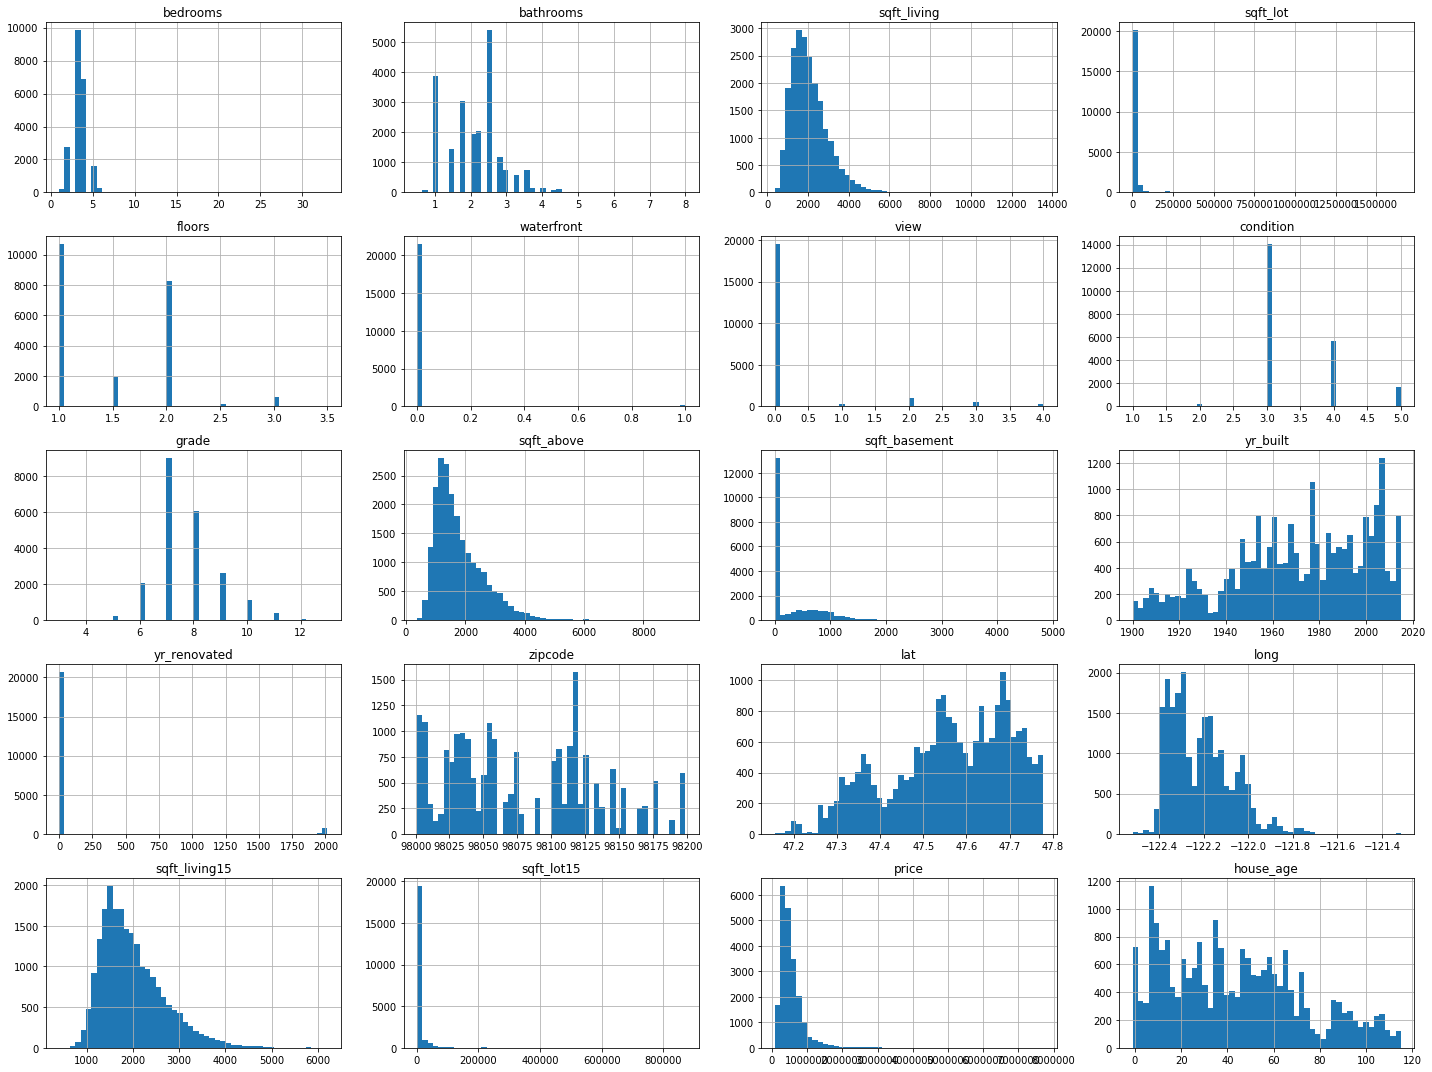

In [36]:
# Remove unecessary columns for the analysis
df = df.drop(columns=['id', 'date', 'year'])

df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

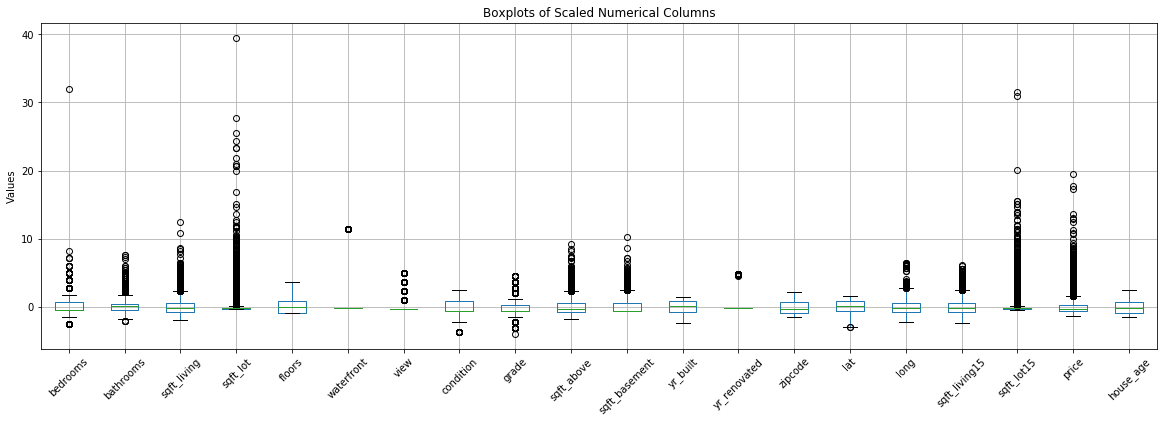

In [37]:
# Initialize the scaler
scaler = StandardScaler()

# Select only numeric features from the DataFrame
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Fit and transform the numeric features with StandardScaler
scaled_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Create boxplots
scaled_df.boxplot(figsize=(20, 6))
plt.title("Boxplots of Scaled Numerical Columns")
plt.ylabel("Values")
plt.xticks(rotation=45)

plt.show()

### Obsevations on Distribution

- **bedrooms**: Most houses have between 2 and 5 bedrooms, with 3 bedrooms being the most common.

- **bathrooms**: Most houses have between 1 and 3 bathrooms. Houses with 2.5 bathrooms (a common configuration with 2 full bathrooms and a half bathroom) are particularly common.

- **sqft_living**: The square footage of living spaces in the houses is right-skewed, meaning most houses have smaller living spaces, but there are a few houses with very large living spaces.

- **sqft_lot**: Similarly, the square footage of lots is also right-skewed. Most houses have smaller lots, but a few houses have very large lots.

- **floors**: Many houses have 1 or 2 floors. There are some houses with 1.5, 2.5, or 3 floors, indicating that some houses have a loft or a half floor.

- **waterfron**t: Almost all houses do not have a waterfront view, as indicated by the bar at 0.

- **view**: Most houses have not been viewed, but some houses have been viewed multiple times.

- **condition**: Most houses are in condition 3 or 4. Very few houses are in poor condition (1) or excellent condition (5).

- **grade**: The grading of the houses seems to follow a normal distribution, with most houses having a grade around 7.

- **sqft_above**: The square footage of house apart from basement is right-skewed, with most houses having smaller areas, but a few houses having very large areas.

- **sqft_basement**: Many houses do not have a basement (indicated by the bar at 0). Among the houses that do have a basement, the square footage of the basement is right-skewed.

- **yr_built**: The year the houses were built is roughly uniformly distributed across the years, with a slight increase in more recent years.

- **yr_renovated**: Most houses have not been renovated (indicated by the bar at 0). Among the houses that have been renovated, the year of renovation is right-skewed.

- **zipcode**: The zip codes appear to be uniformly distributed, indicating that the houses are spread out across the zip codes.

- **lat and long**: The latitude and longitude indicate the geographical location of the houses. There seem to be clusters of houses at certain latitudes and longitudes.

- **sqft_living15 and sqft_lot15**: The square footage of the living room area in 2015 and the lot size area in 2015 are both right-skewed, similar to sqft_living and sqft_lot.

- **price**: The price of the houses is right-skewed. Most houses are priced lower, but there are a few houses with very high prices.


### Outliers

Let's also check the outliers of each features using IQR method. Treating outliers is important for the following several reasons:

1. **Accuracy**: Outliers can significantly affect the mean and standard deviation of your data, which are used in a variety of statistical tests and machine learning models. This can lead to inaccurate results. For example, in a linear regression model, a single outlier can dramatically change the line of best fit, leading to inaccurate predictions.

2. **Model Performance**: Many machine learning algorithms are sensitive to the range and distribution of attribute values in the input data. Outliers in the data can cause problems with these algorithms, leading to poor performance.

3. **Data Quality**: Outliers can sometimes be the result of errors in data collection or entry. Identifying and addressing these outliers can help improve the quality of your data.

3. **Interpretability**: In some cases, outliers can make it more difficult to understand the underlying patterns and trends in your data. Treating these outliers can make your data analysis and visualizations more interpretable.

4. **Assumptions**: Many statistical procedures assume a normal distribution and outliers can violate this assumption, leading to incorrect results.

In [38]:
outliers_dict = {}

for col in numeric_df.columns:

    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = numeric_df[(numeric_df[col] < (Q1 - 1.5 * IQR)) | (numeric_df[col] > (Q3 + 1.5 * IQR))][col]
    
    outlier_percentage = round((len(outliers) / len(numeric_df[col]) * 100),2)
    
    outliers_dict[col] = {'outliers_count': len(outliers), 'outliers_percentage': outlier_percentage}
    outliers_df = pd.DataFrame.from_dict(outliers_dict, orient='index')

outliers_df

,outliers_count,outliers_percentage
bedrooms,530,2.45
bathrooms,561,2.60
sqft_living,571,2.64
sqft_lot,2419,11.20
floors,0,0.00
waterfront,163,0.75
view,2122,9.83
condition,29,0.13
grade,1905,8.82
sqft_above,610,2.82


Here are possible suggestions for treating the outliers in prior to training our machine learning model.

- **'bedrooms'**: 530 outliers. If these represent homes with a very high number of bedrooms, they might be valid entries representing large houses or mansions. Investigate the actual values and consider keeping them or using winsorizing.

- **'bathrooms'**: 561 outliers. Similar to 'bedrooms', these could be valid entries representing large houses. Review the actual values and consider keeping them or using winsorizing.

- **'sqft_living'**: 571 outliers. These might represent particularly large or small houses. Consider a log transformation to handle the skewness of the data.

- **'sqft_lot'**: 2419 outliers. These might represent properties with particularly large lot sizes. A log transformation could be useful here too.

- **'waterfront'**: 163 outliers. This is likely a binary feature indicating whether the property is waterfront or not. Outliers might simply be the less common class (e.g., waterfront properties). If this is the case, no outlier handling is needed.

- **'view'**: 2122 outliers. If this feature represents the number of views a property has had, outliers could be properties that are particularly popular or unpopular. Depending on the distribution, a transformation or winsorizing might be appropriate.

- **'condition'**: 29 outliers. This is likely a categorical variable, and "outliers" are probably just less common conditions. No outlier handling is likely needed.

- **'grade'**: 1905 outliers. If this is a grading system for the quality of a house, outliers may be houses that are extremely high or low quality. These could be important to keep as they may have a significant impact on house prices.

- **'sqft_above', 'sqft_basement'**: These could be handled similarly to 'sqft_living'. Consider a log transformation.

- **'yr_renovated'**: 914 outliers. These might be houses that were recently renovated. If many houses have a value of 0 (indicating no renovation), this could lead to a skewed distribution. One approach could be to turn this into a binary 'was_renovated' feature.

- **'lat', 'long'**: 2 and 255 outliers, respectively. These are coordinates and outliers may represent properties that are geographically distant from others. It might be worth keeping these as they could represent different real estate markets.

- **'sqft_living15', 'sqft_lot15'**: Outliers in these features might be handled in the same way as 'sqft_living' and 'sqft_lot', possibly with a log transformation.

- **'price'**: 1158 outliers. These are likely high-value houses. Because the goal is likely to predict this variable, it's important to handle outliers carefully. A log transformation is a common choice for skewed target variables.

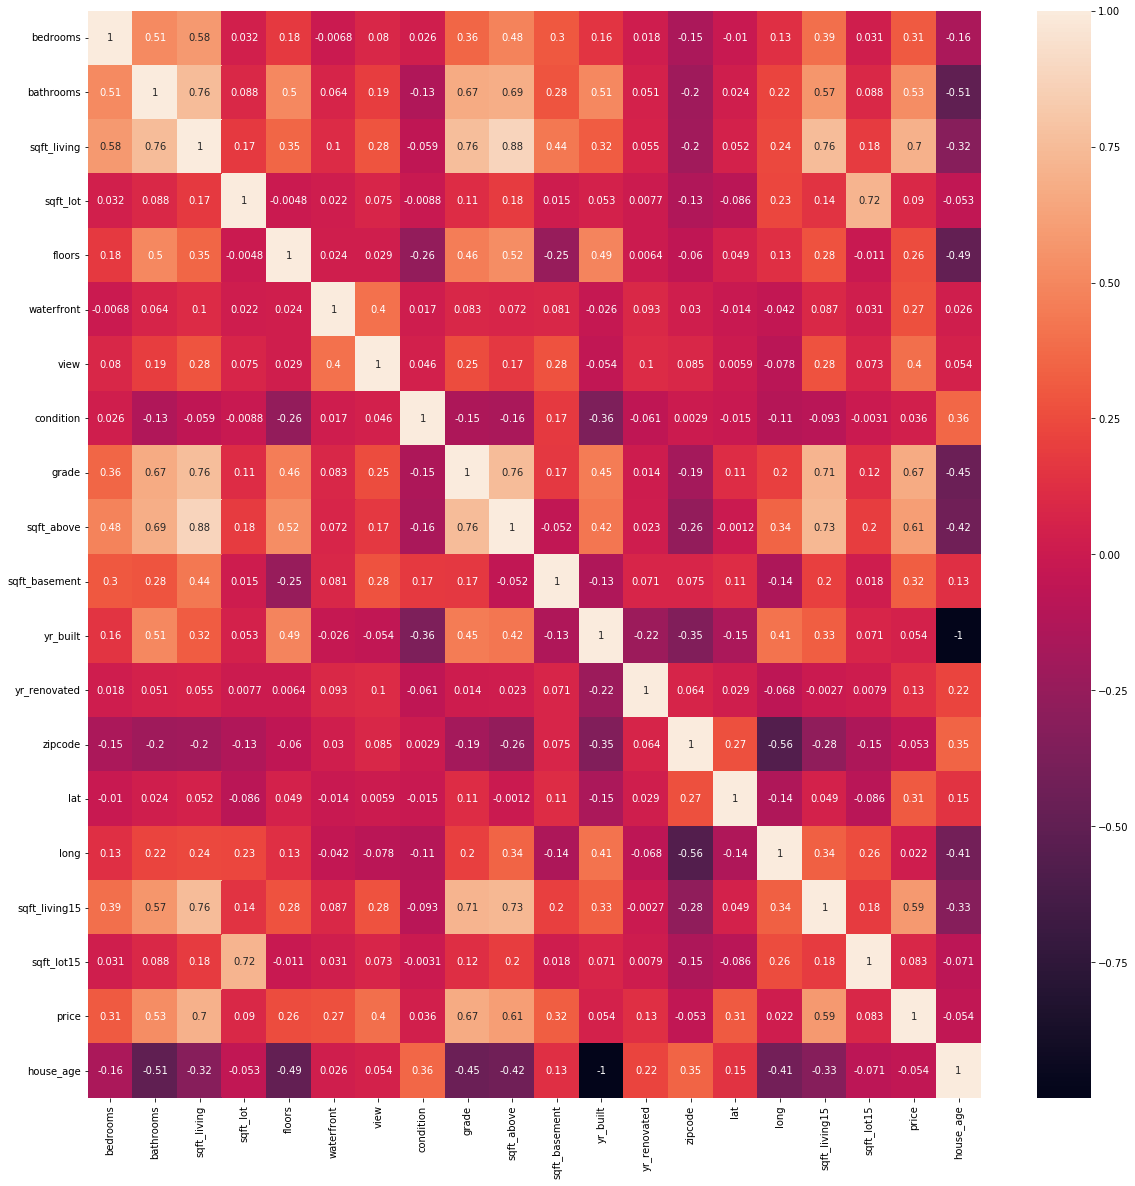

In [39]:
corr_matrix=df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### Observations on Correlation Matrix

- **sqft_living** has a high positive correlation with **price (0.701917)**, meaning that houses with more living space tend to be more expensive. This variable also has strong correlations with **bathrooms (0.755758)**, **grade (0.762779)**, and **sqft_above (0.876448)**, suggesting that larger houses tend to have more bathrooms, higher grades, and more above ground space.

- **grade** and **sqft_above** also have significant positive correlations with **price (0.667951 and 0.605368 respectively)**, suggesting that the quality of the house and the above ground space are important factors in determining the price of a house.


- **floors** and **condition** have a moderate negative correlation (-0.264075), implying that houses with more floors tend not to be in as good condition, or vice versa.

In [40]:
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
zipcode         -0.053402
house_age       -0.053890
Name: price, dtype: float64

The following features reveal particularly strong correlated relationship with price. This suggests that the size and quality of a house (as measured by square footage and grade) are important factors that influence its price:

- **sqft_living**: 0.70
- **grade**: 0.67
- **sqft_above**: 0.61
- **sqft_living15**: 0.59
- **bathrooms**: 0.53



/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


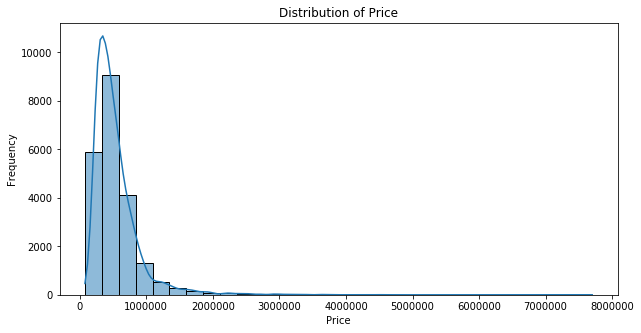

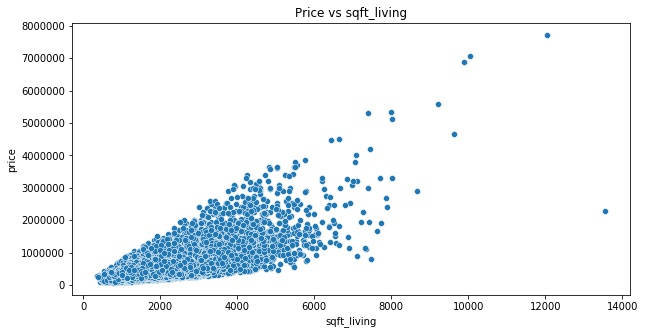

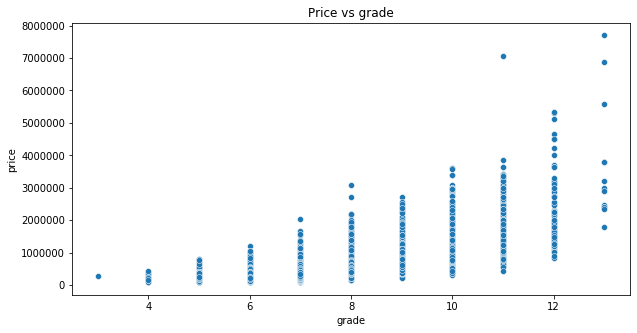

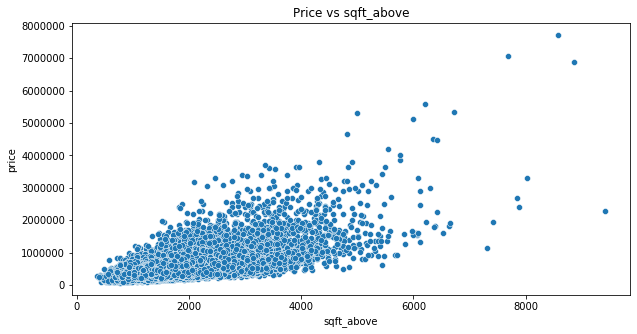

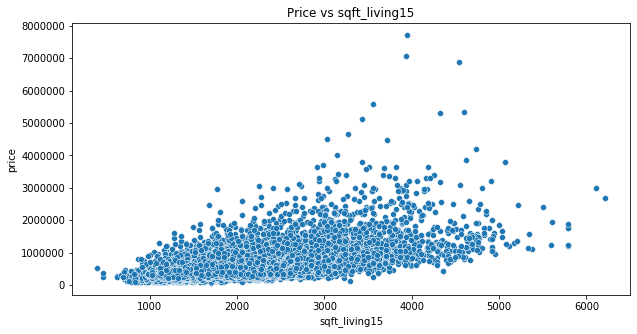

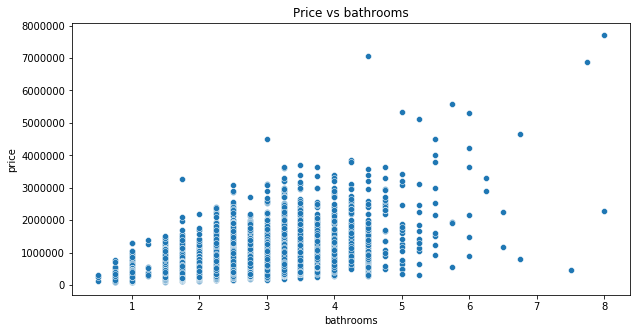

In [41]:
# Plot histogram for 'price'
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plot scatterplots for 'price' vs highly correlated features
highly_corr_features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']
for feature in highly_corr_features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=feature, y='price')
    plt.title(f'Price vs {feature}')
    plt.show()

Here are some observations from the visualizations of **Price vs strongly correalted features**:

- **Price Distribution**: The price distribution is right-skewed, indicating that while most houses are priced on the lower end, there are a few houses with very high prices.

- **Price vs Square Footage of Living Area**: There is a positive correlation between the square footage of the living area (sqft_living) and the price, and the plots appears quite linear relation which makes sense as larger houses tend to be more expensive.

- **Price vs Grade**: The grade of a house also seems to be positively correlated with its price. Higher-graded houses appear to be more expensive. This again is logical as better quality houses are expected to fetch higher prices.

- **Price vs Square Footage Above Ground**: The square footage of house apart from basement (sqft_above) also shows a positive correlation with price. Larger above-ground living spaces tend to increase the price of a house.

- **Price vs Square Footage of Living Area in 2015**: The size of the living area in 2015 (sqft_living15) also seems to affect the price, although there's a bit of spread in the data. Larger living areas in 2015 tend to be associated with higher prices.

- **Price vs Number of Bathrooms**: The number of bathrooms in a house (bathrooms) is also positively correlated with its price. Houses with more bathrooms tend to be more expensive.

These visualizations and observations provide some initial insights into the factors that may affect house prices. However, these are just bivariate relationships. A multivariate analysis or a machine learning model would be needed to better understand and predict house prices.

### Analysis of Categorical Features relative to Price

We will analysse the catergorical features in relation to the price to identify what features could impact on the selling price. First, we would need to create new addiontioal columns 'was_renovated', 'has_basement' which are the binary features if the house was renovated and has basement'.

In [42]:
df['was_renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)
df['has_basement'] = df['sqft_basement'].apply(lambda x: 0 if x == 0 else 1)

In [43]:
df_cat = df.copy()
cols_to_convert = ['waterfront', 'condition', 'grade','was_renovated','has_basement']

for col in cols_to_convert:
    df_cat[col] = df_cat[col].astype(str)
    

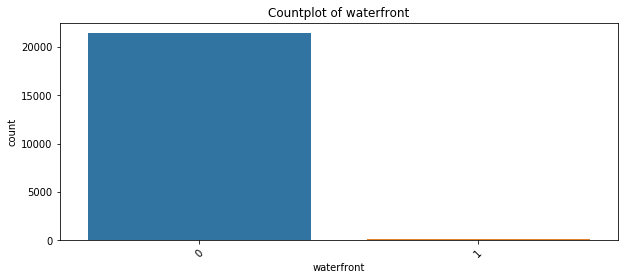

0    21434
1      163
Name: waterfront, dtype: int64


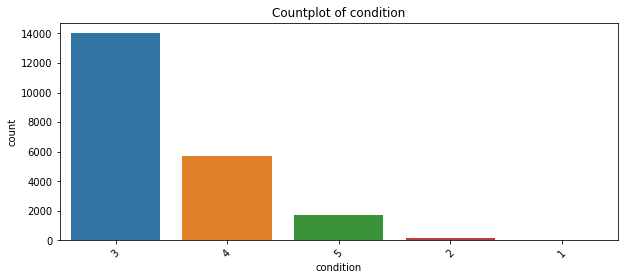

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64


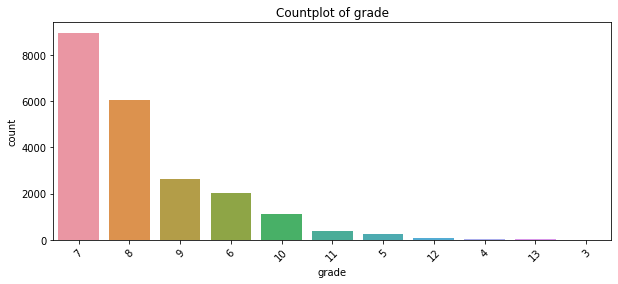

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64


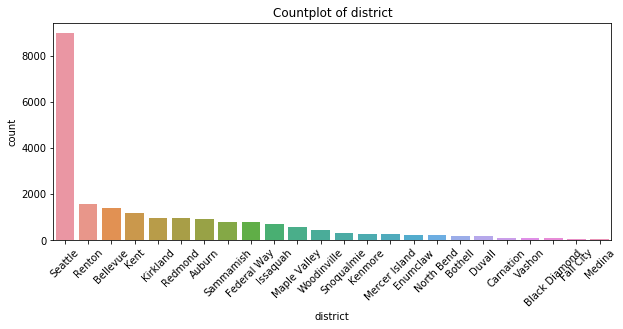

Seattle          8973
Renton           1597
Bellevue         1407
Kent             1201
Kirkland          977
Redmond           977
Auburn            911
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      589
Woodinville       471
Snoqualmie        308
Kenmore           283
Mercer Island     282
Enumclaw          233
North Bend        220
Bothell           195
Duvall            190
Carnation         124
Vashon            117
Black Diamond     100
Fall City          80
Medina             50
Name: district, dtype: int64


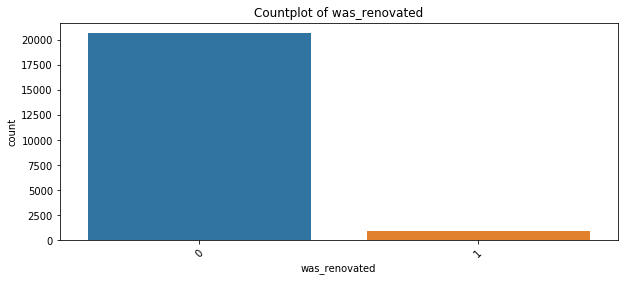

0    20683
1      914
Name: was_renovated, dtype: int64


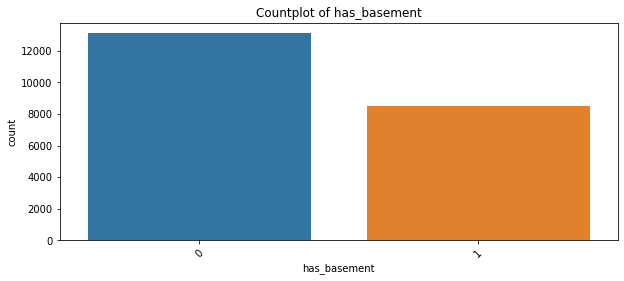

0    13110
1     8487
Name: has_basement, dtype: int64


In [44]:
for column in df_cat.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4))
    order = df_cat[column].value_counts().index
    sns.countplot(x=column, data=df_cat, order=order)
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)
    plt.show()
    
    count_table = df_cat[column].value_counts()
    print(count_table)


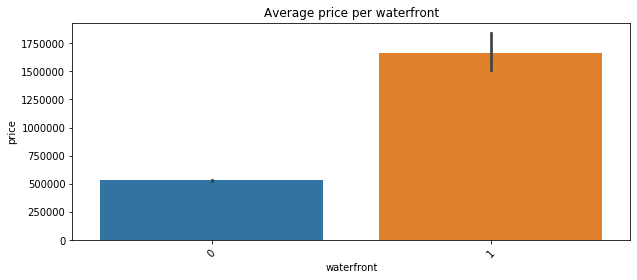

                   price
waterfront              
1           1.662524e+06
0           5.317623e+05


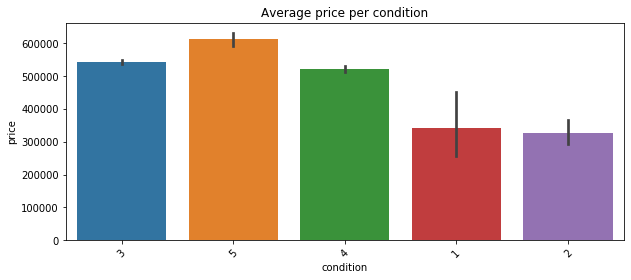

                   price
condition               
5          612577.742504
3          542173.057347
4          521374.450414
1          341067.241379
2          328178.758824


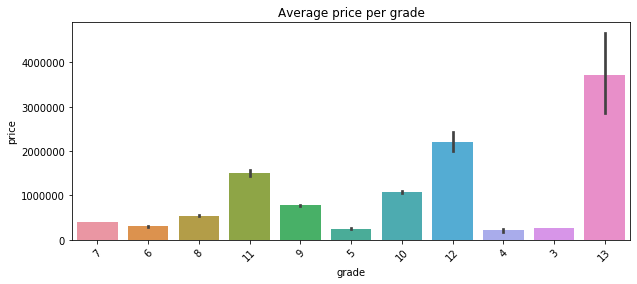

              price
grade              
13     3.710769e+06
12     2.202528e+06
11     1.497792e+06
10     1.072347e+06
9      7.737382e+05
8      5.429868e+05
7      4.025946e+05
6      3.019166e+05
3      2.620000e+05
5      2.485240e+05
4      2.120019e+05


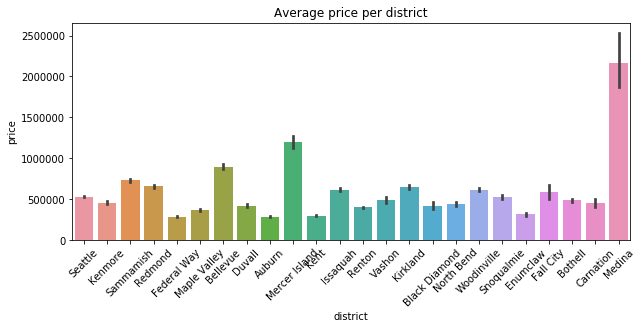

                      price
district                   
Medina         2.161300e+06
Mercer Island  1.194874e+06
Bellevue       8.984661e+05
Sammamish      7.328210e+05
Redmond        6.584318e+05
Kirkland       6.465428e+05
Woodinville    6.174979e+05
Issaquah       6.151222e+05
Fall City      5.861209e+05
Seattle        5.350856e+05
Snoqualmie     5.296298e+05
Bothell        4.903771e+05
Vashon         4.893820e+05
Kenmore        4.624889e+05
Carnation      4.556171e+05
North Bend     4.402323e+05
Duvall         4.248151e+05
Black Diamond  4.236660e+05
Renton         4.034685e+05
Maple Valley   3.670915e+05
Enumclaw       3.167424e+05
Kent           2.994700e+05
Auburn         2.916478e+05
Federal Way    2.893913e+05


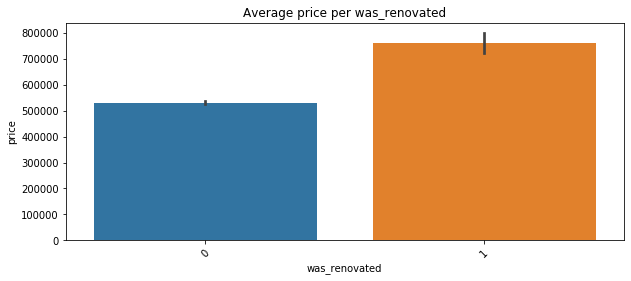

                       price
was_renovated               
1              760628.777899
0              530559.899193


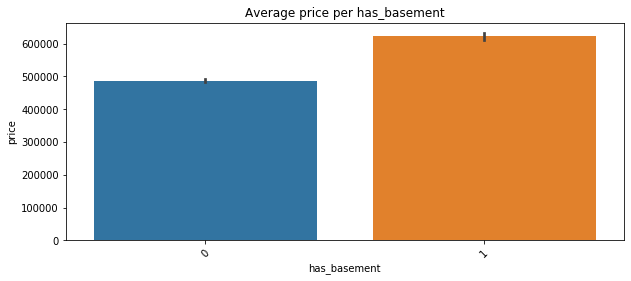

                      price
has_basement               
1             622518.174384
0             487068.905568


In [45]:
for column in df_cat.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 4)) 
    sns.barplot(x=column, y='price', data=df_cat)
    plt.title(f'Average price per {column}')
    plt.xticks(rotation=45)
    plt.show()
    
    avg_price = pd.concat([df_cat[column], df['price']], axis=1).groupby(column).mean()
    print(avg_price.sort_values(by='price',ascending=False))

### Obsevations on Categorical features relative to Price

- **Waterfront**: Houses with a waterfront are on average significantly more expensive than those without. The average price of houses with a waterfront is about 1.66 million, while those without are about 531,762.

- **Condition**: The condition of a house also affects its average price. Houses in condition '5' (assuming '5' represents the best condition) have an average price of about 612,578, while those in condition '1' have an average price of around 341,067. The table suggests that, generally, houses in better condition fetch higher prices.

- **Grade**: The house prices also seem to increase with the grade of the house. Houses with a grade of '13' have the highest average price at approximately 3.71 million. On the other end of the spectrum, houses with a grade of '4' have an average price of around 212,002.

- **District**: The district where the house is located also significantly affects the average price. Houses in Medina have the highest average price of around 2.16 million, while those in Federal Way have the lowest average price of approximately 289,391.

- **Was_renovated**: Houses that have been renovated are generally more expensive than those that haven't. The average price of houses that were renovated is about $760,629, while those that were not renovated have an average price of around 530,560.

- **Has_basement**: Having a basement seems to add value to a house as well. Houses with a basement have an average price of approximately 622,518, while those without a basement have an average price of about 487,069.

# 5. Data Modelling

### Baseline models

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [47]:
df_model = df.copy()


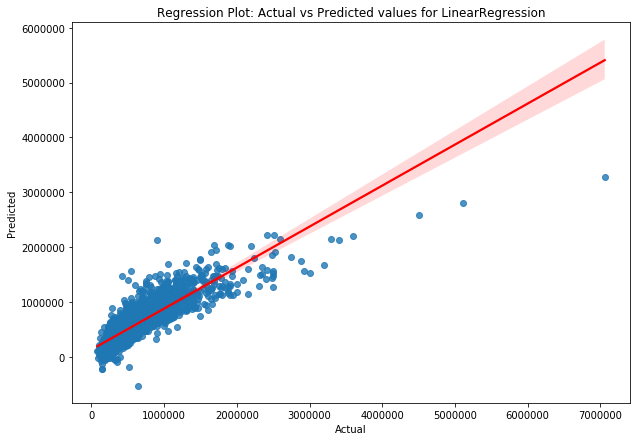

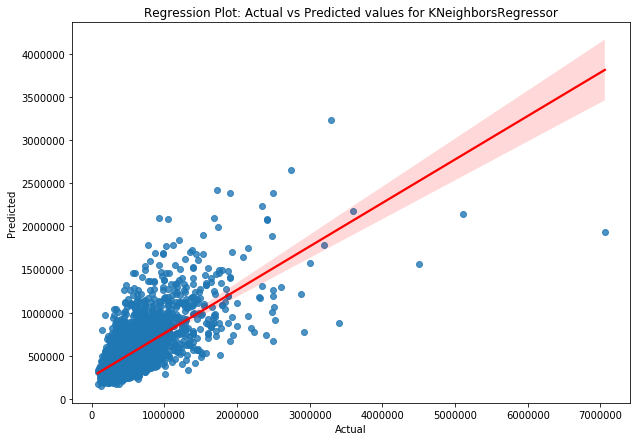

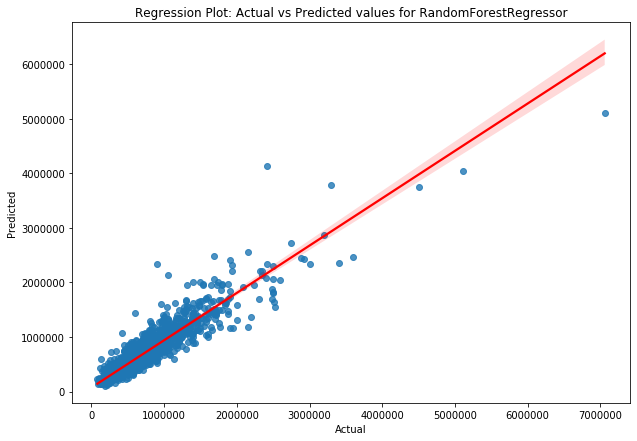

In [48]:
#encoding
df_model = pd.get_dummies(df_model)


X = df_model.drop(columns=['price'])
Y = df_model['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


models = [LinearRegression(), KNeighborsRegressor(), RandomForestRegressor()]


metrics_df = pd.DataFrame(columns=["Model", "r2", "rmse", "mae"])

for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    
    rmse = mean_squared_error(Y_test, predictions, squared=False)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)

    metrics_dict = {"Model": str(type(model).__name__), "r2": r2, "rmse": rmse, "mae": mae}


    metrics_df = metrics_df.append(metrics_dict, ignore_index=True)

    plt.figure(figsize=(10, 7))
    sns.regplot(x=Y_test, y=predictions, line_kws={"color": "red"})
    
    plt.title(f'Regression Plot: Actual vs Predicted values for {str(type(model).__name__)}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    


### Data validation

- R-squared (R²) Score: is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). It ranges from 0 to 1, with a higher value indicating a better fit of the model.

- Root Mean Squared Error (RMSE): Measures the average magnitude of the errors in a set of predictions, with more weight to large errors due to squaring.

- Mean Absolute Error (MAE): Measures the average magnitude of the errors in a set of predictions, without considering their direction.

The key difference is RMSE is more sensitive to outliers than MAE.

In [49]:
print(metrics_df)


                   Model        r2           rmse            mae
0       LinearRegression  0.742048  183274.659666  112183.571208
1    KNeighborsRegressor  0.498109  255644.918851  156184.477917
2  RandomForestRegressor  0.882826  123522.901479   67809.255682


### Standard Scale

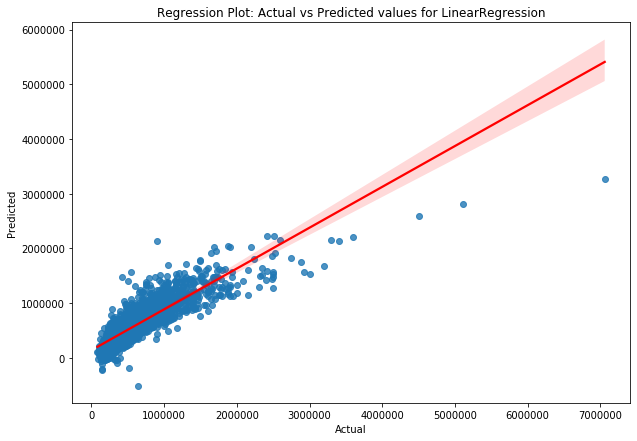

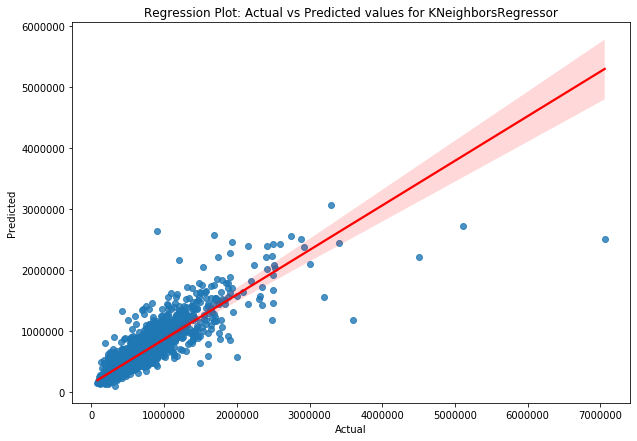

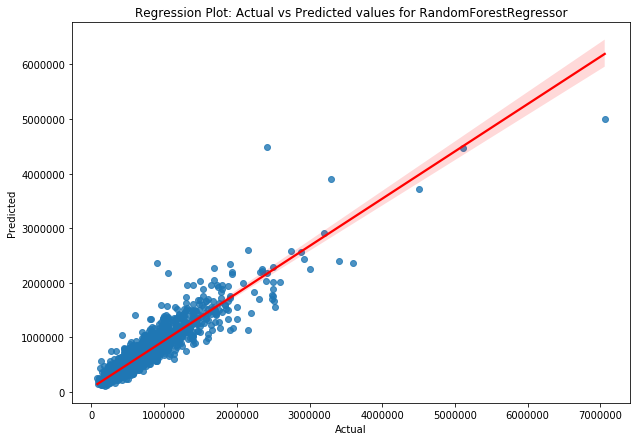

                   Model        r2           rmse            mae
0       LinearRegression  0.742068  183267.316245  112177.437798
1    KNeighborsRegressor  0.775983  170794.208355   86532.520972
2  RandomForestRegressor  0.880524  124730.788660   67899.713662


In [53]:
df_model_std = df_model.copy()


X = df_model_std.drop(columns=['price'])
Y = df_model_std['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 



metrics_df = pd.DataFrame(columns=["Model", "r2", "rmse", "mae"])

for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    
    rmse = mean_squared_error(Y_test, predictions, squared=False)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)

    metrics_dict = {"Model": str(type(model).__name__), "r2": r2, "rmse": rmse, "mae": mae}


    metrics_df = metrics_df.append(metrics_dict, ignore_index=True)

    plt.figure(figsize=(10, 7))
    sns.regplot(x=Y_test, y=predictions, line_kws={"color": "red"})
    
    plt.title(f'Regression Plot: Actual vs Predicted values for {str(type(model).__name__)}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()

    
print(metrics_df)





### Log Transform
We will first treat the outliers of each features according to the suggestion that we have discussed in the previous part.

We will log transform the following features : 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price'


In [54]:
df_model_log = df_model.copy()

columns_to_transform = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']

for col in columns_to_transform:
    df_model_log[col] = np.log1p(df_model_log[col])
    
    

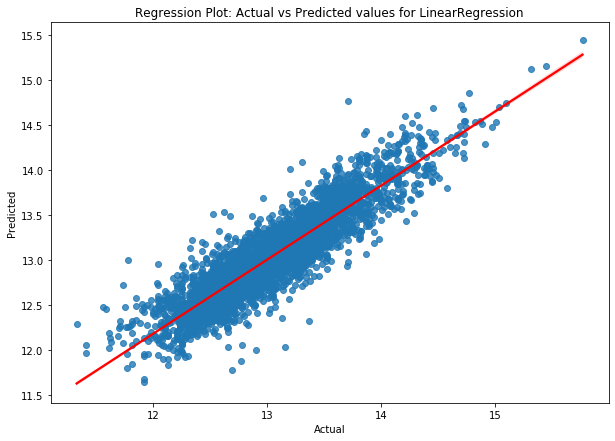

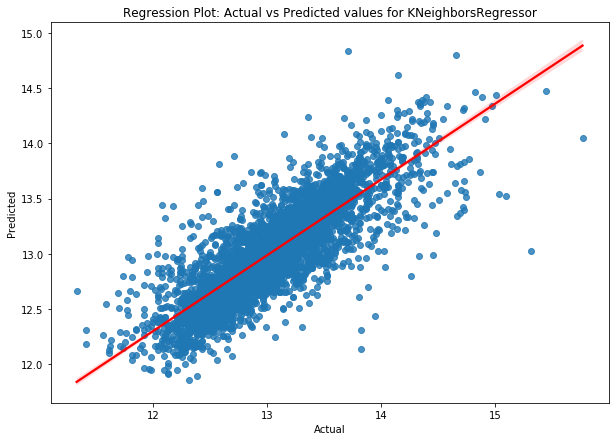

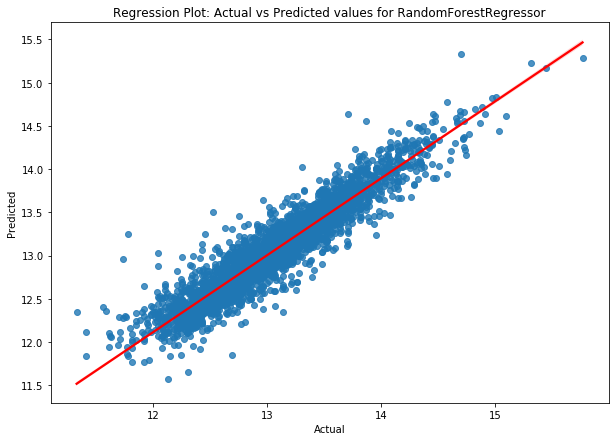

                   Model        r2           rmse            mae
0       LinearRegression  0.821547  154003.783149   91272.948197
1    KNeighborsRegressor  0.680017  245955.979248  116925.041881
2  RandomForestRegressor  0.888219  132187.828386   68706.876887


In [55]:

X = df_model_log.drop(columns=['price'])
Y = df_model_log['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


models = [LinearRegression(), KNeighborsRegressor(), RandomForestRegressor()]

metrics_df = pd.DataFrame(columns=["Model", "r2", "rmse", "mae"])

for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    
    # compute metrics in log-transformed scale
    rmse = mean_squared_error(Y_test, predictions, squared=False)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)

    # unscale the predictions
    predictions_unscaled = np.expm1(predictions)
    Y_test_unscaled = np.expm1(Y_test)

    # compute metrics in original scale
    rmse_unscaled = mean_squared_error(Y_test_unscaled, predictions_unscaled, squared=False)
    mae_unscaled = mean_absolute_error(Y_test_unscaled, predictions_unscaled)

    metrics_dict = {
        "Model": str(type(model).__name__),
        "r2": r2,
        "rmse": rmse_unscaled,
        "mae": mae_unscaled
    }

    metrics_df = metrics_df.append(metrics_dict, ignore_index=True)

    plt.figure(figsize=(10, 7))
    sns.regplot(x=Y_test, y=predictions, line_kws={"color": "red"})
    
    plt.title(f'Regression Plot: Actual vs Predicted values for {str(type(model).__name__)}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    
print(metrics_df)



    

There is slight improvement in accuracy by log transform the features. Let's further check if we can improve better by featrue selection to reduce multicolinearity detected by correlation matrix

### Feature Selection

In [56]:
# Feature Slelection using coef
df_model.corr()['price'].sort_values(ascending=False)

price                     1.000000
sqft_living               0.701917
grade                     0.667951
sqft_above                0.605368
sqft_living15             0.585241
bathrooms                 0.525906
view                      0.397370
sqft_basement             0.323799
bedrooms                  0.308787
lat                       0.306692
waterfront                0.266398
district_Bellevue         0.257381
floors                    0.256804
district_Medina           0.212561
district_Mercer Island    0.204952
has_basement              0.180082
yr_renovated              0.126424
was_renovated             0.126082
district_Sammamish        0.102787
sqft_lot                  0.089876
sqft_lot15                0.082845
district_Redmond          0.069999
district_Kirkland         0.062954
yr_built                  0.053953
district_Issaquah         0.038178
condition                 0.036056
district_Woodinville      0.031379
long                      0.022036
district_Fall City  

In [57]:
# Checking Multi-Colinearity between features:
correlations_matrix = df_model.corr()
correlations_matrix = correlations_matrix[((correlations_matrix > .8) | (correlations_matrix < -.8))]
correlations_matrix.fillna(0)[:20]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,district_Medina,district_Mercer Island,district_North Bend,district_Redmond,district_Renton,district_Sammamish,district_Seattle,district_Snoqualmie,district_Vashon,district_Woodinville
bedrooms,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
bathrooms,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
sqft_living,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.876448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
sqft_lot,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
floors,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
waterfront,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
view,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
condition,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
grade,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
sqft_above,0.0,0.0,0.876448,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


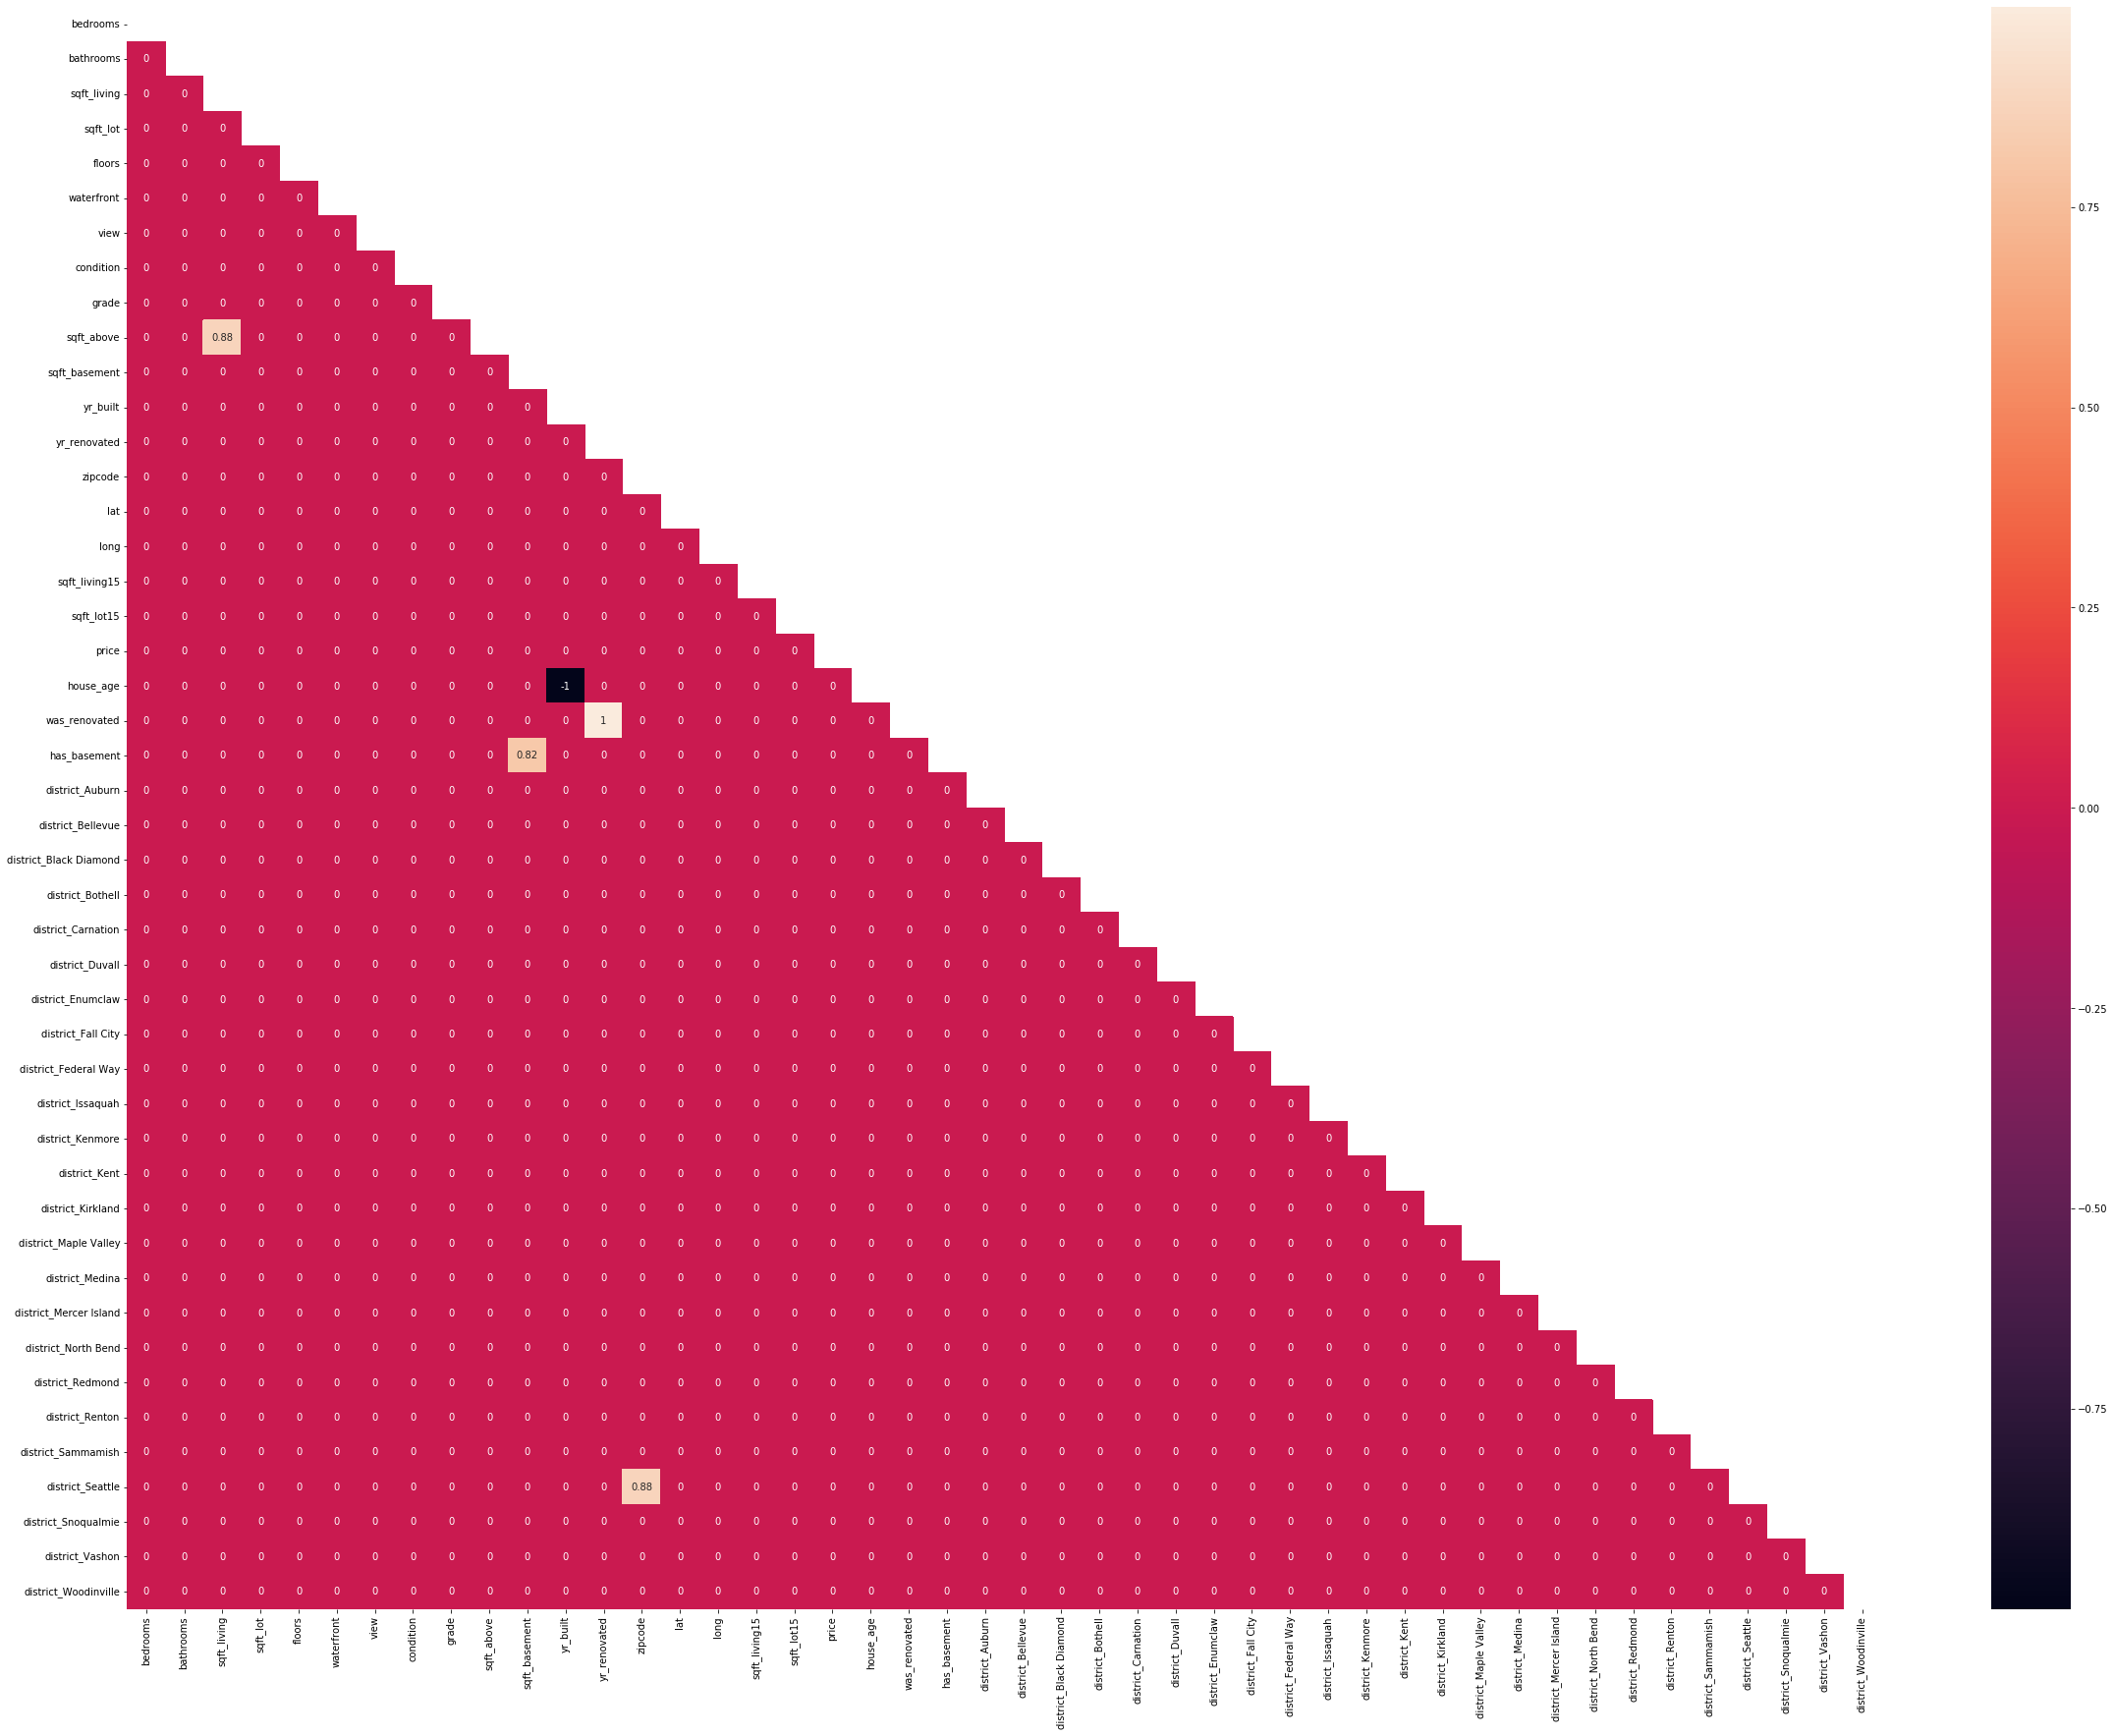

In [58]:
correlations_matrix = correlations_matrix.fillna(0)
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(40, 30))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [64]:
# # remove multicorrelinerity. Long and lat can replace zipcode and district.
df_model = df_model.drop(['sqft_above','zipcode','house_age','yr_renovated','sqft_basement'],axis=1)


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'was_renovated', 'has_basement',
       'district_Auburn', 'district_Bellevue', 'district_Black Diamond',
       'district_Bothell', 'district_Carnation', 'district_Duvall',
       'district_Enumclaw', 'district_Fall City', 'district_Federal Way',
       'district_Issaquah', 'district_Kenmore', 'district_Kent',
       'district_Kirkland', 'district_Maple Valley', 'district_Medina',
       'district_Mercer Island', 'district_North Bend', 'district_Redmond',
       'district_Renton', 'district_Sammamish', 'district_Seattle',
       'district_Snoqualmie', 'district_Vashon', 'district_Woodinville'],
      dtype='object')

### Retraining the model

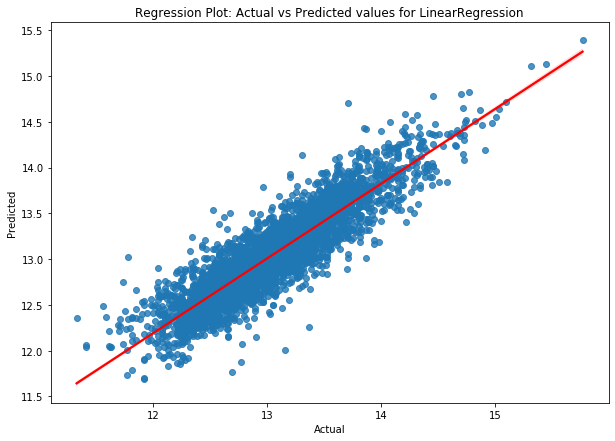

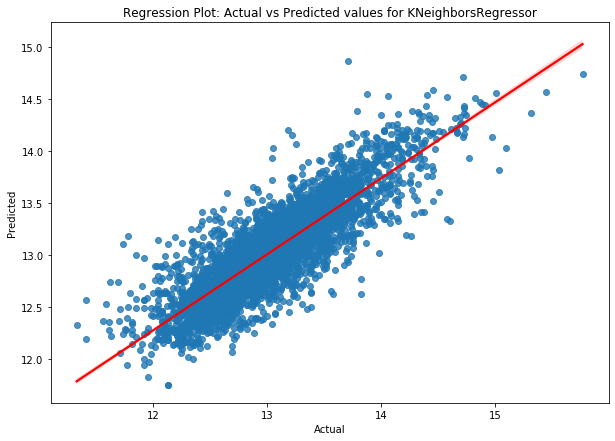

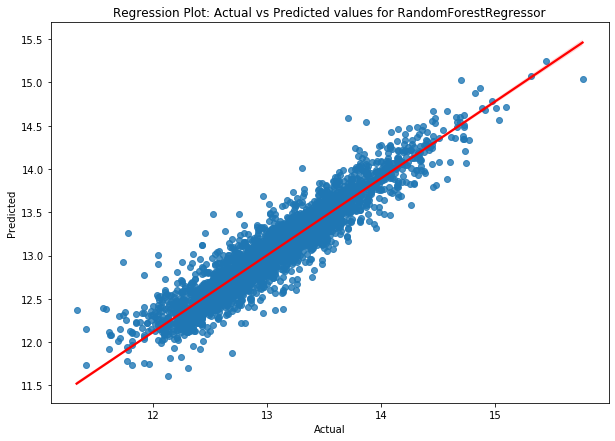

                   Model        r2           rmse            mae
0       LinearRegression  0.809026  159856.704789   94731.294641
1    KNeighborsRegressor  0.734856  205497.597999  108032.489523
2  RandomForestRegressor  0.887901  133140.087130   68544.701544


In [67]:
df_model_log = df_model.copy()

columns_to_transform = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'price']

for col in columns_to_transform:
    df_model_log[col] = np.log1p(df_model_log[col])

    
    

X = df_model_log.drop(columns=['price'])
Y = df_model_log['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)





models = [LinearRegression(), KNeighborsRegressor(), RandomForestRegressor()]


metrics_df = pd.DataFrame(columns=["Model", "r2", "rmse", "mae"])

for model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    
    # compute metrics in log-transformed scale
    rmse = mean_squared_error(Y_test, predictions, squared=False)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)

    # unscale the predictions
    predictions_unscaled = np.expm1(predictions)
    Y_test_unscaled = np.expm1(Y_test)

    # compute metrics in original scale
    rmse_unscaled = mean_squared_error(Y_test_unscaled, predictions_unscaled, squared=False)
    mae_unscaled = mean_absolute_error(Y_test_unscaled, predictions_unscaled)

    metrics_dict = {
        "Model": str(type(model).__name__),
        "r2": r2,
        "rmse": rmse_unscaled,
        "mae": mae_unscaled
    }

    metrics_df = metrics_df.append(metrics_dict, ignore_index=True)

    plt.figure(figsize=(10, 7))
    sns.regplot(x=Y_test, y=predictions, line_kws={"color": "red"})
    
    plt.title(f'Regression Plot: Actual vs Predicted values for {str(type(model).__name__)}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.show()
    
print(metrics_df)


# 7.Cross-examination of models

In this data project, the effect of varying preprocessing techniques on the performance of three machine learning models - Linear Regression, KNeighborsRegressor, and RandomForestRegressor - was examined. Here's an analysis of the results obtained from each preprocessing stage:

1. **Initial Model (Post Basic Data Cleaning)**: 

    - Linear Regression performs best with 74.2% of the variance explained and the lowest prediction errors.
    - Random Forest follows closely with 88.3% variance explained but higher errors.
    - KNN struggles with only 49.8% variance explained and the highest errors.


2. **Model with Standard Scaling**: 

    - Scaling data notably enhances KNN's performance, explaining 77.6% variance and reducing errors.
    - Linear Regression and Random Forest don't significantly change, implying they aren't sensitive to feature scaling.


3. **Model with Log Transformation**:

    - Log-scaling improves Linear Regression (82.2% variance explained, lower errors).
    - KNN's performance drops, indicating log-scaling may not always benefit distance-based algorithms.
    - Random Forest slightly improves, possibly due to a reduction in data skewness.

4. **Model with Log Transformation & Reduced Multicollinearity**:

    - Feature selection slightly reduces the performance of Linear Regression, indicating potential loss of useful information.
    - KNN improves, likely benefiting from reduced dimensionality.
    - Random Forest performance remains unchanged, suggesting robustness against multicollinearity.

# 8. Feature Importance

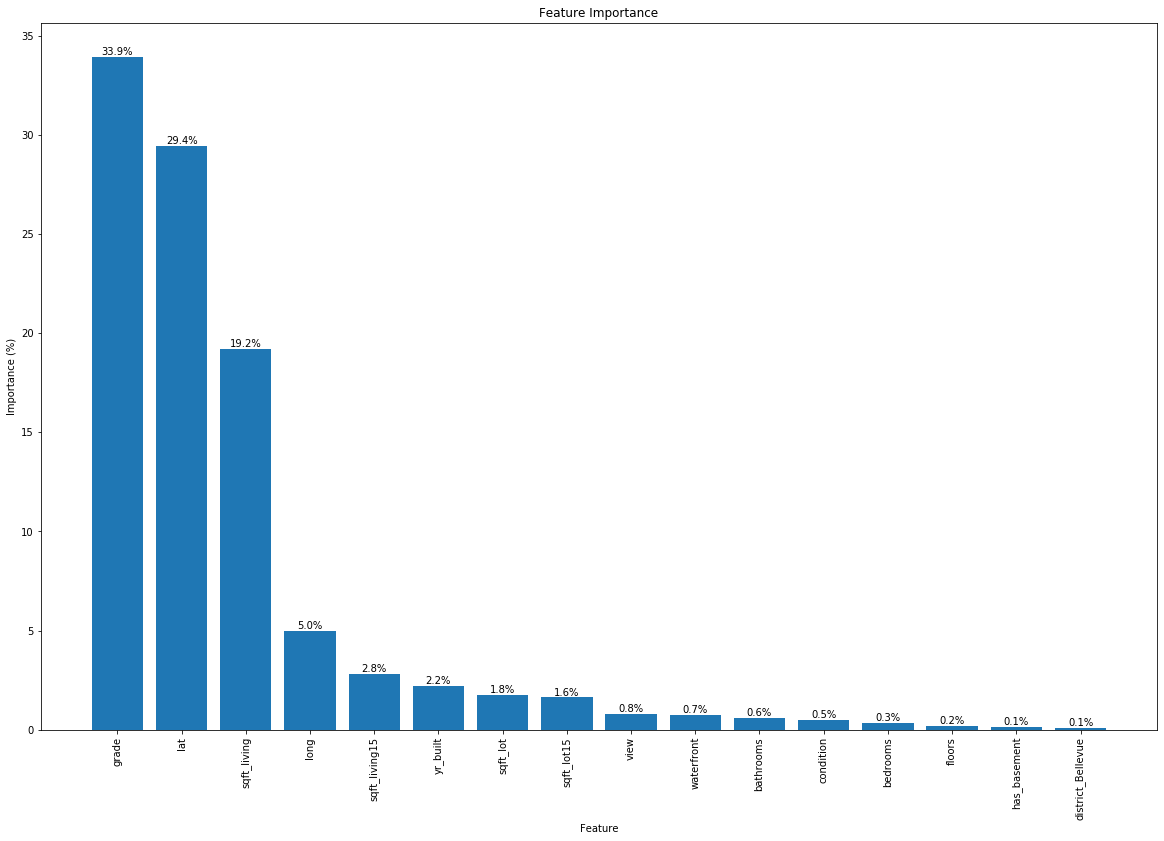

In [68]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

importances = rf.feature_importances_
feature_names = X.columns

# Normalize the importance values and convert to percentage
importances = 100.0 * (importances / np.sum(importances))

# Filter importances and features based on the condition of importances > 0.1%
importances, feature_names = zip(*((importance, feature) for importance, feature in zip(importances, feature_names) if importance > 0.1))

importances = np.array(importances)
feature_names = np.array(feature_names)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 13))
barplot = plt.bar(range(len(importances)), importances[indices], align="center")

plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance (%)")
plt.title("Feature Importance")

# Adding the percentage labels on top of each bar
for rect in barplot:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f'{height:.1f}%', ha='center', va='bottom')

plt.show()


The features grade, lat, and sqft_living have the highest importance values according to the Random Forest model, suggesting they play a significant role in predicting the house prices. These variables likely have strong relationships with the house price:

- grade (33.94%): This probably refers to the grading given based on the King County grading system. Higher grade houses are usually of higher quality and have better finishes, hence more expensive.
- lat (29.45%): This refers to the latitude coordinate of the house. Location (north or south) can have a big impact on the price of a house. Certain latitudes may correspond to more desirable locations, such as being closer to city centers or better schools, thus driving up house prices.
- sqft_living (19.20%): This is the square footage of the apartment interior living space. Larger houses typically cost more, so it's expected this feature is important.

- The rest of the features contribute less to the model, with importance below 6%, indicating that while they do have some effect on the price of the house, they are not as significant as the top three. However, it's important to remember that even features with lower importance can have significant effects in specific contexts or when interacting with other features. For example, waterfront may have a huge effect on price for houses in certain locations, even though its overall importance is low.

# Conclusion

- The RandomForestRegressor emerged as the top-performing model across various data preprocessing techniques such as standard scaling and log transformation.

- Features like grade, lat, and sqft_living were found to significantly influence the price, with the grade reflecting the house's quality, lat representing the location, and sqft_living indicating the house size.

- It is recommended to consider additional social factors like transportation, education, and crime rates for a more comprehensive price prediction.
